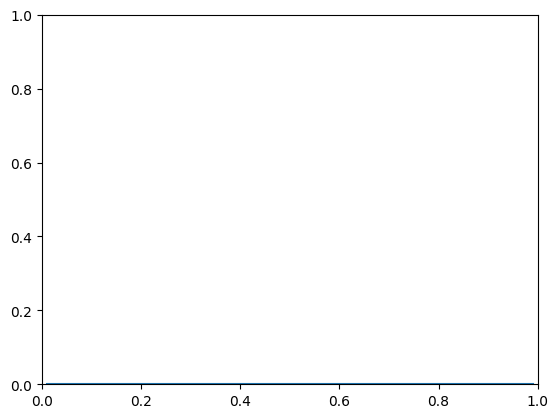

In [1]:
from finite_difference import Grid, BoundaryCondition, diffusion_solver
from matplotlib.animation import FuncAnimation 
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
from integrate import integrate
from continuation import continuation
%matplotlib widget
from IPython.display import HTML

In [ ]:
""" INTEGRATING USING HOME-MADE solve_to FUNCTION """


In [2]:
t_steps = 1000
storage = 'sparse'
D=1
dt = 0.1
method = 'crank-nicolson'

grid = Grid(N=100, a=0, b=1)
bc_left = BoundaryCondition('dirichlet', [lambda t: 0], grid)
bc_right = BoundaryCondition('dirichlet', [lambda t: 0], grid)
x = grid.x
q = 1
IC = 0


u = diffusion_solver(grid,
                    bc_left,
                    bc_right,
                    IC = 0,
                    D=0.1,
                    q=1,
                    dt=0.1,
                    t_steps=t_steps,
                    method='crank-nicolson',
                    storage = 'sparse')

if bc_left.type == 'dirichlet':
    x = x[1:]
if bc_right.type == 'dirichlet':
    x = x[:-1] 

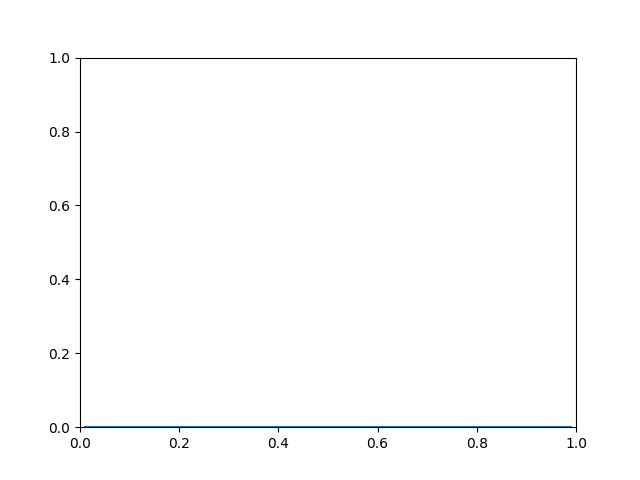

In [4]:
""" ANIMATING SOLUTION """

fig,ax = plt.subplots()

line, = ax.plot(x,u[:,0])
ax.set_ylim(0,1)
ax.set_xlim(grid.left,grid.right)

def animate(i):
    line.set_data((x,u[:,i]))
    return line,

ani = FuncAnimation(fig, animate, frames=t_steps, interval=100, blit=True)
plt.show()


In [5]:

""" PLOT SOLUTION AS 3D SURFACE """

t_values = np.arange(0, (t_steps + 1) * dt, dt)
fig = go.Figure(data=[go.Surface(z=u, x=t_values, y=x)])

fig.update_layout(
    title='u(x,t)',
    autosize=False,
    scene=dict(
        xaxis=dict(range=[0, 3]),
        xaxis_title='t',
        yaxis_title='x',
        zaxis_title='u(x, t)'),
    width=500,
    height=500,
    margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()